In [34]:
import cv2

#path = 'C:/Users/lokes/OneDrive/Pictures/Camera Roll/WIN_20240705_19_24_27_Pro.jpg'
#import cv2

In [35]:
# Load a pre-trained face detector classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [36]:
path = 'C:/Users/lokes/OneDrive/Pictures/Camera Roll/WIN_20240705_19_24_27_Pro.jpg'
#path = 'WIN_20240705_19_24_27_Pro.jpg'
image = cv2.imread(path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

In [37]:
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

In [38]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

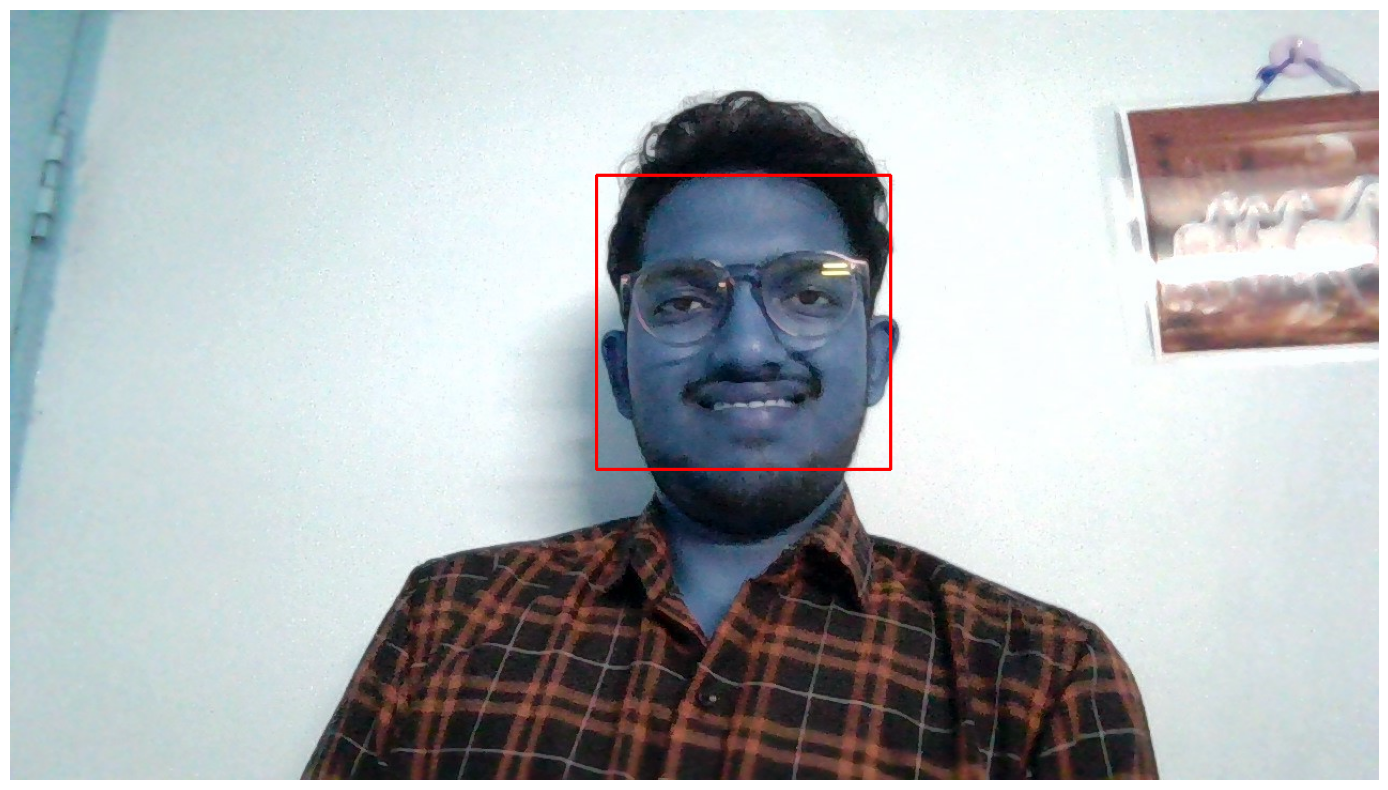

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [40]:
!pip install tensorflow opencv-python matplotlib scikit-learn


In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define paths
train_dir = 'C:/Users/lokes/Downloads/data/'  # Update with your actual path
val_dir = 'C:/Users/lokes/Downloads/validation/'      # Update with your actual path

# Debug: Check directory structure
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Load a pre-trained model and customize for face detection (SSD MobileNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

# Add custom layers on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)  # Update if binary classification

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

# Debug: Check if generators are loading data
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")

# Ensure samples exist before training
if train_generator.samples > 0 and val_generator.samples > 0:
    # Train the model
    history = model.fit(train_generator,
                        validation_data=val_generator,
                        epochs=10)

    # Evaluate the model
    val_loss, val_acc = model.evaluate(val_generator)
    print(f"Validation Accuracy: {val_acc}")

    # Display efficiency parameters
    y_true = val_generator.classes
    y_pred = np.argmax(model.predict(val_generator), axis=1)

    
else:
    print("No images found in the directories. Please check the paths and data.")


Training directory: C:/Users/lokes/Downloads/data/
Validation directory: C:/Users/lokes/Downloads/validation/
Found 853 images belonging to 2 classes.
Found 227 images belonging to 2 classes.
Number of training samples: 853
Number of validation samples: 227
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9843 - loss: 0.0479 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 223s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 1.0000 - loss

True labels: [1 1 1 1 1 1 1 1 1 1]
Predicted labels: [1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

        anno       0.00      0.00      0.00         0
         img       1.00      1.00      1.00       227

   micro avg       1.00      1.00      1.00       227
   macro avg       0.50      0.50      0.50       227
weighted avg       1.00      1.00      1.00       227



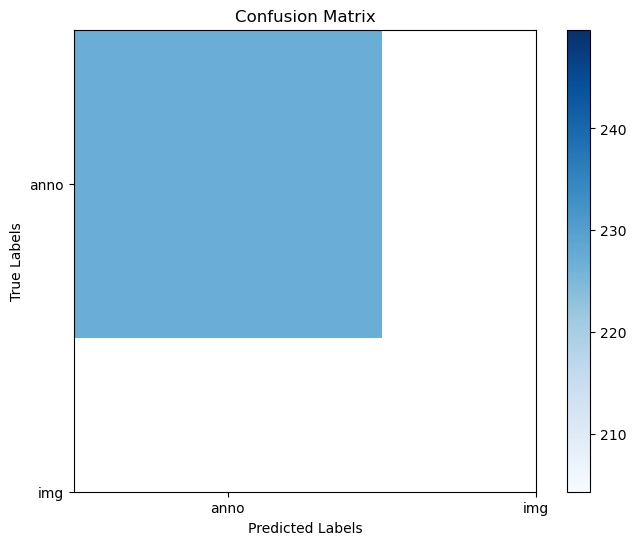

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Assuming the class labels detected are {'annotations': 0, 'images': 1}
class_labels = list(val_generator.class_indices.keys())

# Debug: Print the first 10 true and predicted labels to ensure they match
print("True labels:", y_true[:10])  
print("Predicted labels:", y_pred[:10])

# Generate classification report by explicitly setting the labels found
# Use `labels` parameter to match detected classes
print(classification_report(
    y_true, y_pred, 
    target_names=class_labels, 
    labels=[0, 1]  # Ensure these labels match the indices used in y_true and y_pred
))

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
